<a href="https://colab.research.google.com/github/TJhon/DI-src/blob/main/Inmersion_datos_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 1

In [1]:
install.packages("librarian")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
librarian::shelf(
  ggplot2, dplyr, janitor, stringr
)
theme_set(theme_minimal())

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [3]:
datos = read.csv("https://caelum-online-public.s3.amazonaws.com/alura-latam-inmersion-datos/alura_latam-inmersion_datos-arhivos_descarga/inmuebles_bogota.csv") |>
  clean_names()
glimpse(datos)

Rows: 9,520
Columns: 8
$ tipo         <chr> "Apartamento", "Casa", "Apartamento", "Apartamento", "Apa…
$ descripcion  <chr> "Apartamento en venta en Zona Noroccidental", "Casa en ve…
$ habitaciones <int> 3, 4, 3, 3, 2, 1, 1, 3, 3, 2, 2, 3, 2, 3, 4, 3, 3, 2, 2, …
$ banos        <int> 2, 3, 3, 2, 3, 2, 2, 4, 2, 2, 2, 2, 1, 3, 3, 4, 2, 2, 1, …
$ area         <int> 70, 170, 144, 154, 128, 62, 62, 212, 159, 80, 80, 59, 45,…
$ barrio       <chr> "Zona Noroccidental", "Castilla", "Chico Reservado", "Usa…
$ upz          <chr> "CHAPINERO: Pardo Rubio + Chapinero", "KENNEDY: Castilla …
$ valor        <chr> "$ 360.000.000", "$ 670.000.000", "$ 1.120.000.000", "$ 8…


In [4]:
area_promedio = datos |>
  group_by(barrio) |> summarise(area_eval = mean(area)) |> arrange(desc(area_eval)) |> 
  top_n(10)
area_promedio

Selecting by area_eval


barrio,area_eval
<chr>,<dbl>
Modelia,4316.7500
Libertador,642.0000
Bosa Piamonte,400.0000
La Soledad,378.6250
Restrepo,336.5000
Santa Librada,328.0000
Las Ferias,320.0000
Santa Ana,309.3750
Veraguas,302.6667


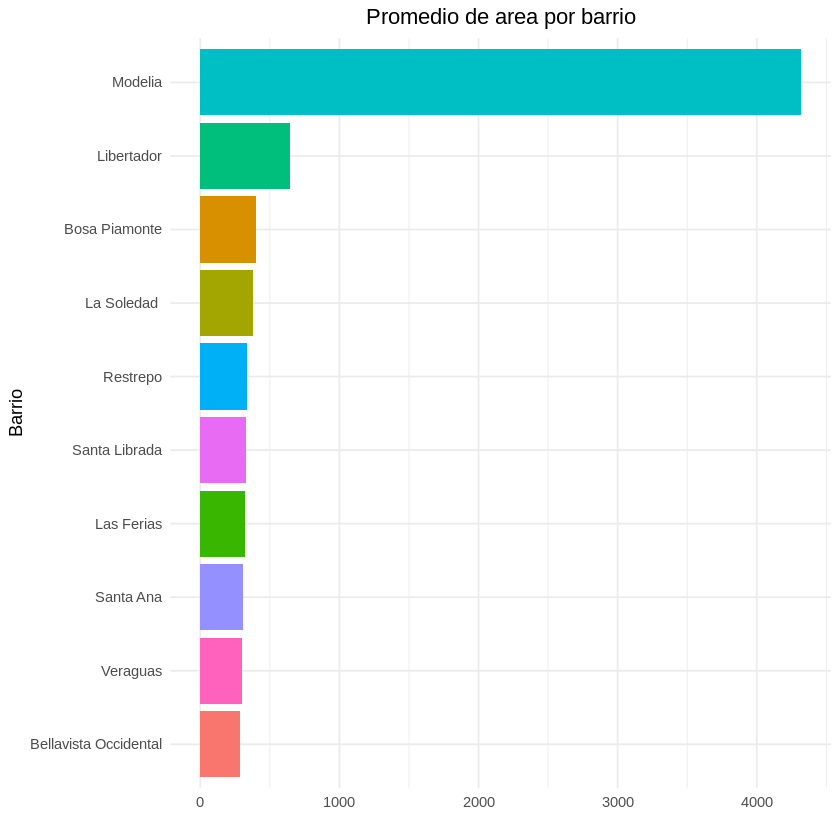

In [5]:
grafico = area_promedio |>
  ggplot() +
  geom_col(aes(x = reorder(barrio, area_eval), area_eval, fill = barrio)) + 
  coord_flip() +
  labs(x = "Barrio", y = "", title = "Promedio de area por barrio") +
  theme(legend.position = "none", plot.title = element_text(hjust = .5))
plot(grafico)

Selecting by area_eval
Selecting by area_eval


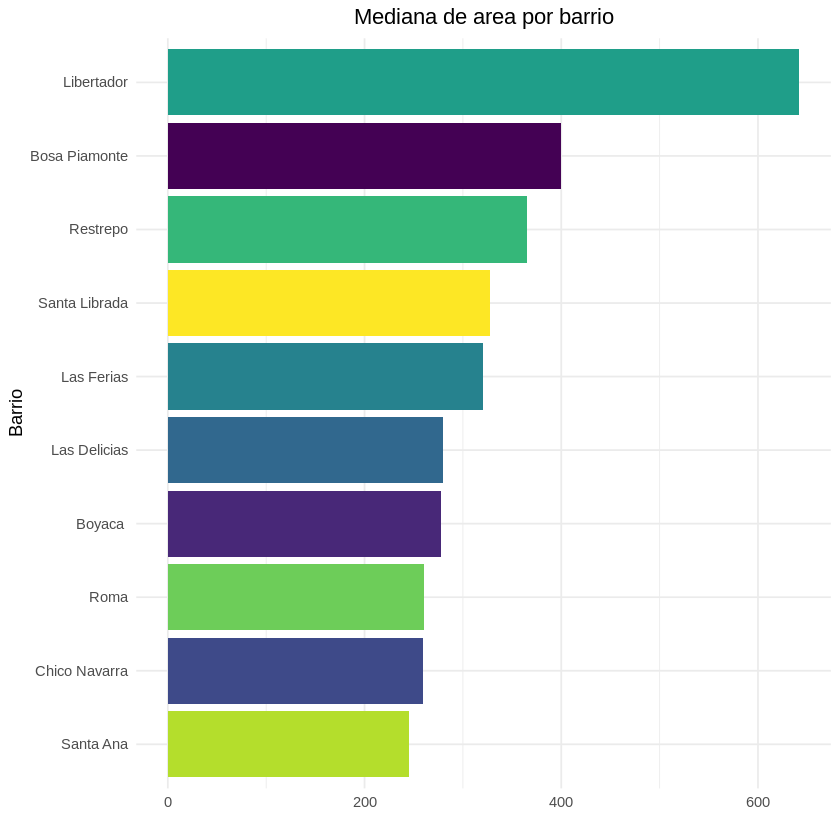

Selecting by area_eval


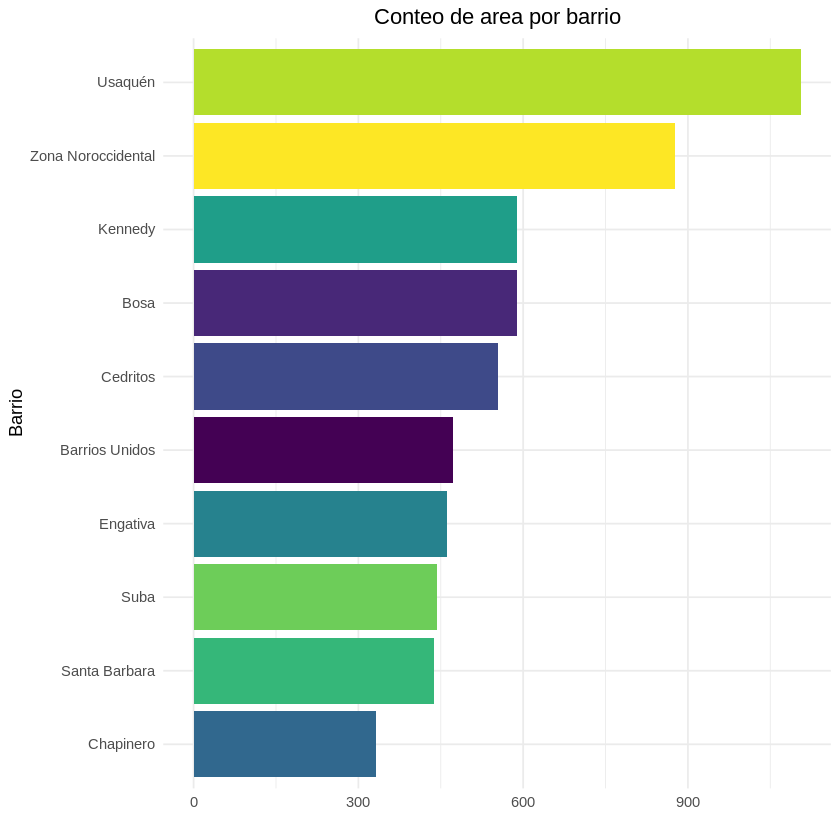

Selecting by area_eval


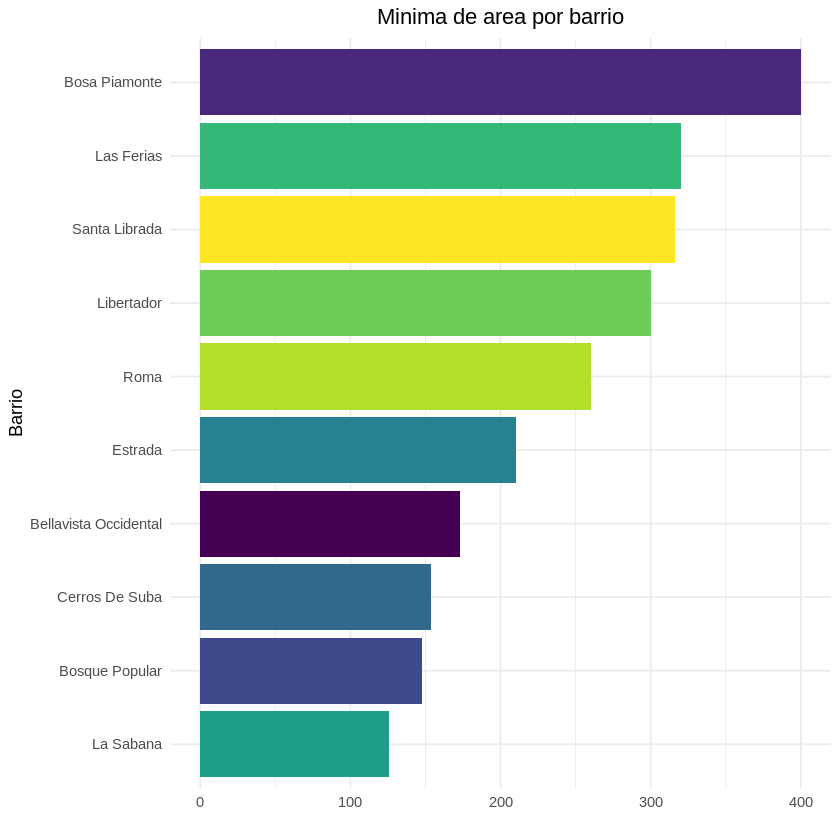

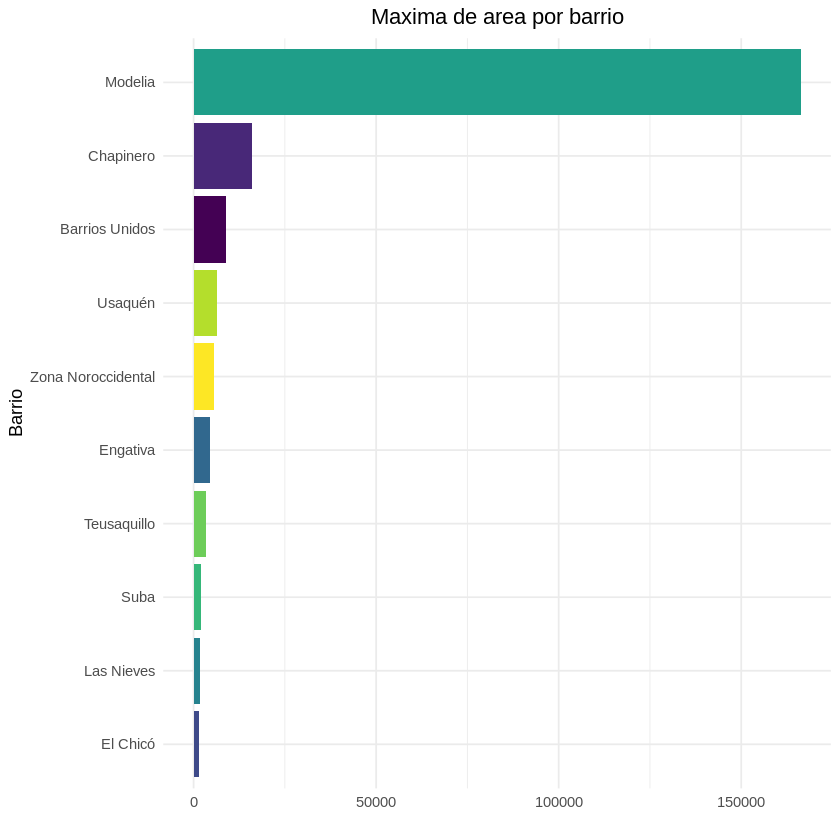

In [6]:


otros_estadisticos = function(estadistico){
  if(estadistico == "mediana"){
    area_promedio = datos |>  group_by(barrio) |> summarise(area_eval = median(area)) |> arrange(desc(area_eval)) |> top_n(10)
  } else if(estadistico == "conteo"){
    area_promedio = datos |>  group_by(barrio) |> summarise(area_eval = n()) |> arrange(desc(area_eval)) |> top_n(10)
  } else if(estadistico == "minima"){
    area_promedio = datos |>  group_by(barrio) |> summarise(area_eval = min(area)) |> arrange(desc(area_eval)) |> top_n(10)
  } else if(estadistico == "maxima"){
    area_promedio = datos |>  group_by(barrio) |> summarise(area_eval = max(area)) |> arrange(desc(area_eval)) |> top_n(10)
  } else {
    stop("Estadistico no valido.")
  }
  grafico = area_promedio |>
    ggplot() +
    geom_col(aes(x = reorder(barrio, area_eval), area_eval, fill = barrio)) + 
    coord_flip() +
    labs(x = "Barrio", y = "", title = paste(str_to_sentence(estadistico), "de area por barrio") ) +
    theme(legend.position = "none", plot.title = element_text(hjust = .5)) +
    scale_fill_viridis_d()
  plot(grafico) 
}

otros_estadisticos("mediana")
otros_estadisticos("conteo")
otros_estadisticos("minima")
otros_estadisticos("maxima")

# Clase 2

In [7]:
head(datos)

,tipo,descripcion,habitaciones,banos,area,barrio,upz,valor
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
2,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
3,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
4,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
5,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000
6,Apartamento,Apartamento en venta en Bella Suiza,1,2,62,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 510.000.000


In [8]:
datos1 = datos |> mutate(
  precio10_6 = str_remove_all(valor, "[$|.]") |> as.numeric() / (10 ^ 6),
  precio_m2 = precio10_6 / area
  )
datos1 |> head()

,tipo,descripcion,habitaciones,banos,area,barrio,upz,valor,precio10_6,precio_m2
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,360,5.142857
2,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,670,3.941176
3,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,1120,7.777778
4,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,890,5.779221
5,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,970,7.578125
6,Apartamento,Apartamento en venta en Bella Suiza,1,2,62,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 510.000.000,510,8.225806


In [9]:
tipos_3 = c('Apartamento', 'Oficina/Consultorio', 'Local')
tipos_3

[1] "Apartamento"         "Oficina/Consultorio" "Local"

In [10]:
datos_muestra = datos1 |> filter(tipo %in% tipos_3)
datos_muestra |> head()

,tipo,descripcion,habitaciones,banos,area,barrio,upz,valor,precio10_6,precio_m2
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,360,5.142857
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,1120,7.777778
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,890,5.779221
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,970,7.578125
5,Apartamento,Apartamento en venta en Bella Suiza,1,2,62,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 510.000.000,510,8.225806
6,Apartamento,Apartamento en venta en Bella Suiza,1,2,62,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 500.000.000,500,8.064516


Warning message:
“Removed 7 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_bar()`).”


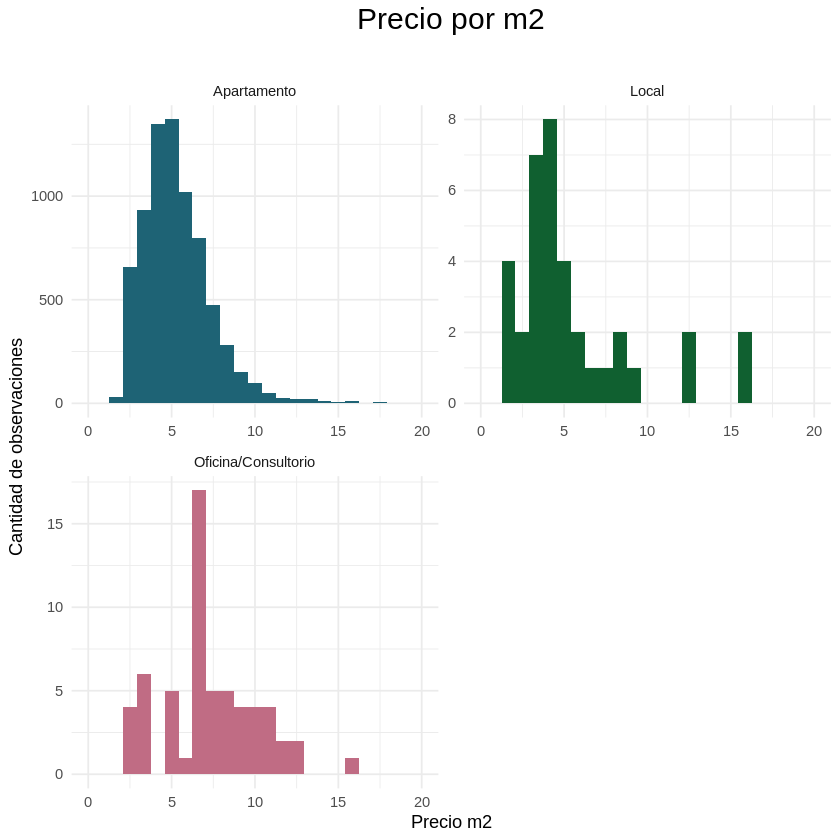

In [11]:
colores = c('#1e6375', '#106030', '#C06C84')
datos_muestra |>
  ggplot() +
  aes(precio_m2, fill = tipo) +
  geom_histogram(bins = 25) +
  facet_wrap(~tipo, nrow = 2, scales = "free") + 
  scale_fill_manual(values = colores) +
  theme(legend.position = "none", plot.title = element_text(hjust = .5, size = 18)) +
  xlim(0, 20) +
  labs(
    title = "Precio por m2\n",
    x = "Precio m2",
    y = "Cantidad de observaciones"
  )

In [12]:
datos_grouped = datos_muestra |> group_by(barrio, tipo) |> 
  summarise(m2_promedio = mean(precio_m2, na.rm = T)) 
  
 datos_grouped |> head()

`summarise()` has grouped output by 'barrio'. You can override using the
`.groups` argument.


barrio,tipo,m2_promedio
<chr>,<chr>,<dbl>
Alameda,Apartamento,5.979381
Alhambra,Apartamento,4.809751
Andes Norte,Apartamento,6.803824
Antonio Nariño,Apartamento,3.956894
Barrancas,Apartamento,4.415957
Barrios Unidos,Apartamento,4.616820


In [13]:
barrios_2more = datos_grouped |> count(barrio) |> filter(n >= 2) |> pull(barrio)

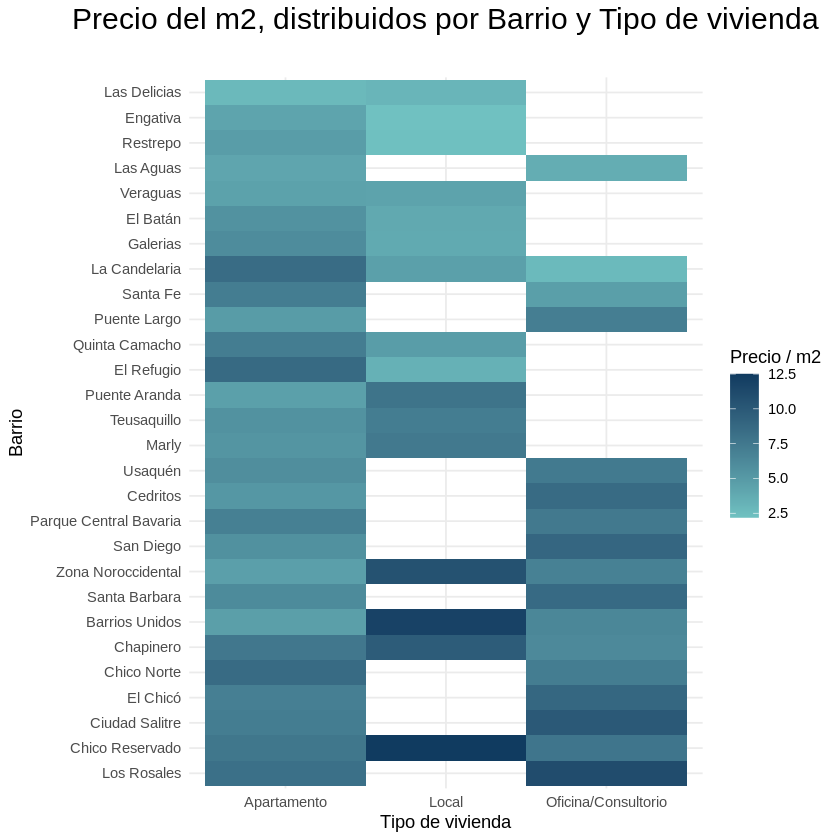

In [14]:
mi_paleta <- scale_fill_gradient(low = "blue", high = "red")
datos_grouped |>
  ungroup() |>
  filter(barrio %in% barrios_2more) |>
  ggplot() +
  geom_tile(aes(tipo, reorder(barrio, -m2_promedio), fill = m2_promedio)) +
  labs(
    x = "Tipo de vivienda",
    y = "Barrio",
    title = "Precio del m2, distribuidos por Barrio y Tipo de vivienda\n",
    fill = "Precio / m2"
  ) +
  scale_fill_gradient(low = "#70c1c1", high = "#103b60") +
  theme( plot.title = element_text(hjust = .5, size = 18)) 